<a href="https://colab.research.google.com/github/Okeezodumu/Machine-learning/blob/main/GRP_Project_on_Student_Performance_(Student)_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification Group Project

In [ ]:
"""About Dataset
Context:
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:


famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
failures - number of past class failures (numeric: n if 1<=n<3, else 4)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
freetime - free time after school (numeric: from 1 - very low to 5 - very high)
goout - going out with friends (numeric: from 1 - very low to 5 - very high)
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:
"""
print()

### Based on Class tutorials, attempt using all the available classification algorithms to predict the student grades based on any of the features chosen. Hint: use feature importance code to select the useful features.

### Use the train_test_split to create the training and test datasets

In [1]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
# %pwd

In [3]:
%pwd

'/content'

In [4]:
# First task is to import the raw Excel file for processing purpose
filename = 'Student_Performance_Analysis.xlsx'

student_df = pd.read_excel(filename,sheet_name=0,skiprows=0,nrows=373)

In [5]:
student_df

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,GT3,A,4,4,at_home,teacher,mother,2,2,0,...,yes,no,4,3,4,1,1,3,6,F
1,GT3,T,1,1,at_home,other,father,1,2,0,...,yes,yes,5,3,3,1,1,3,4,F
2,LE3,T,1,1,at_home,other,mother,1,2,3,...,yes,yes,4,3,2,2,3,3,10,D
3,GT3,T,4,2,health,services,mother,1,3,0,...,yes,yes,3,2,2,1,1,5,2,A
4,GT3,T,3,3,other,other,father,1,2,0,...,yes,no,4,3,2,1,2,5,4,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,GT3,T,2,3,at_home,services,father,2,1,0,...,yes,yes,5,2,3,1,2,4,0,C
369,GT3,T,4,4,other,teacher,father,3,2,0,...,yes,yes,3,2,2,4,2,5,10,B
370,LE3,T,3,2,services,services,other,2,2,2,...,yes,no,3,2,2,1,1,3,4,F
371,LE3,T,1,2,at_home,services,father,3,1,0,...,no,yes,4,3,3,2,3,3,3,B


In [6]:
# Identifiying columns with Nan Values
for cols in student_df.columns:
    print(f'\t{cols:<28}: {student_df[cols].isna().sum()} NaN Values')

	famsize                     : 0 NaN Values
	Pstatus                     : 0 NaN Values
	Medu                        : 0 NaN Values
	Fedu                        : 0 NaN Values
	Mjob                        : 0 NaN Values
	Fjob                        : 0 NaN Values
	guardian                    : 0 NaN Values
	traveltime                  : 0 NaN Values
	studytime                   : 0 NaN Values
	failures                    : 0 NaN Values
	schoolsup                   : 0 NaN Values
	famsup                      : 0 NaN Values
	paid                        : 0 NaN Values
	activities                  : 0 NaN Values
	nursery                     : 0 NaN Values
	higher                      : 0 NaN Values
	internet                    : 0 NaN Values
	famrel                      : 0 NaN Values
	freetime                    : 0 NaN Values
	goout                       : 0 NaN Values
	Dalc                        : 0 NaN Values
	Walc                        : 0 NaN Values
	health                      : 0

In [7]:
# Checking the shape of the dataframe
student_df.shape

(373, 25)

In [8]:
# checking for number of unique values in the target
student_df.Grade.nunique()

5

In [9]:
# Calculating ratio of target to records
ratio = student_df['Grade'].nunique()/student_df.shape[0]
print(f'ratio = {np.round(ratio*100,2)} %')

ratio = 1.34 %


In [10]:
# Getting all the columns in the dataset.
student_df.columns

Index(['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'Grade'],
      dtype='object')

In [11]:
student_df.dtypes

,0
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object
guardian,object
traveltime,int64
studytime,int64
failures,int64


In [12]:
objList = student_df.select_dtypes(include = "object").columns
print (objList)

Index(['famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'Grade'],
      dtype='object')


In [13]:

for column in objList:
    student_df[column] = student_df[column].astype ("string")

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   famsize     373 non-null    string
 1   Pstatus     373 non-null    string
 2   Medu        373 non-null    int64 
 3   Fedu        373 non-null    int64 
 4   Mjob        373 non-null    string
 5   Fjob        373 non-null    string
 6   guardian    373 non-null    string
 7   traveltime  373 non-null    int64 
 8   studytime   373 non-null    int64 
 9   failures    373 non-null    int64 
 10  schoolsup   373 non-null    string
 11  famsup      373 non-null    string
 12  paid        373 non-null    string
 13  activities  373 non-null    string
 14  nursery     373 non-null    string
 15  higher      373 non-null    string
 16  internet    373 non-null    string
 17  famrel      373 non-null    int64 
 18  freetime    373 non-null    int64 
 19  goout       373 non-null    int64 
 20  Dalc      

In [14]:
#  Change the target column into binary classification by creating 'Pass' or 'Fail'
# Creating another column for grade Grade2
# A-D = Pass
# F = Fail
student_df.loc[student_df['Grade']=='A','result']='Pass'
student_df.loc[student_df['Grade']=='B','result']='Pass'
student_df.loc[student_df['Grade']=='C','result']='Pass'
student_df.loc[student_df['Grade']=='D','result']='Pass'
student_df.loc[student_df['Grade']=='E','result']='Fail'
student_df.loc[student_df['Grade']=='F','result']='Fail'

student_df

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,internet,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,result
0,GT3,A,4,4,at_home,teacher,mother,2,2,0,...,no,4,3,4,1,1,3,6,F,Fail
1,GT3,T,1,1,at_home,other,father,1,2,0,...,yes,5,3,3,1,1,3,4,F,Fail
2,LE3,T,1,1,at_home,other,mother,1,2,3,...,yes,4,3,2,2,3,3,10,D,Pass
3,GT3,T,4,2,health,services,mother,1,3,0,...,yes,3,2,2,1,1,5,2,A,Pass
4,GT3,T,3,3,other,other,father,1,2,0,...,no,4,3,2,1,2,5,4,D,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,GT3,T,2,3,at_home,services,father,2,1,0,...,yes,5,2,3,1,2,4,0,C,Pass
369,GT3,T,4,4,other,teacher,father,3,2,0,...,yes,3,2,2,4,2,5,10,B,Pass
370,LE3,T,3,2,services,services,other,2,2,2,...,no,3,2,2,1,1,3,4,F,Fail
371,LE3,T,1,2,at_home,services,father,3,1,0,...,yes,4,3,3,2,3,3,3,B,Pass


In [15]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [16]:
# Converting Categorical Data into Numerical data

le = LabelEncoder()
for feat in objList:
    student_df[feat] = le.fit_transform(student_df[feat].astype(str))

In [17]:
student_df

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,internet,famrel,freetime,goout,Dalc,Walc,health,absences,Grade,result
0,0,0,4,4,0,4,1,2,2,0,...,0,4,3,4,1,1,3,6,4,Fail
1,0,1,1,1,0,2,0,1,2,0,...,1,5,3,3,1,1,3,4,4,Fail
2,1,1,1,1,0,2,1,1,2,3,...,1,4,3,2,2,3,3,10,3,Pass
3,0,1,4,2,1,3,1,1,3,0,...,1,3,2,2,1,1,5,2,0,Pass
4,0,1,3,3,2,2,0,1,2,0,...,0,4,3,2,1,2,5,4,3,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,1,2,3,0,3,0,2,1,0,...,1,5,2,3,1,2,4,0,2,Pass
369,0,1,4,4,2,4,0,3,2,0,...,1,3,2,2,4,2,5,10,1,Pass
370,1,1,3,2,3,3,2,2,2,2,...,0,3,2,2,1,1,3,4,4,Fail
371,1,1,1,2,0,3,0,3,1,0,...,1,4,3,3,2,3,3,3,1,Pass


In [18]:
# Exporting Results
student_df.to_excel("Clean Student Performance Data v4.xlsx")
print("The data output has been exported successfully")

The data output has been exported successfully


In [19]:
#Getting an idea of the structure of the dataframe
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   famsize     373 non-null    int64 
 1   Pstatus     373 non-null    int64 
 2   Medu        373 non-null    int64 
 3   Fedu        373 non-null    int64 
 4   Mjob        373 non-null    int64 
 5   Fjob        373 non-null    int64 
 6   guardian    373 non-null    int64 
 7   traveltime  373 non-null    int64 
 8   studytime   373 non-null    int64 
 9   failures    373 non-null    int64 
 10  schoolsup   373 non-null    int64 
 11  famsup      373 non-null    int64 
 12  paid        373 non-null    int64 
 13  activities  373 non-null    int64 
 14  nursery     373 non-null    int64 
 15  higher      373 non-null    int64 
 16  internet    373 non-null    int64 
 17  famrel      373 non-null    int64 
 18  freetime    373 non-null    int64 
 19  goout       373 non-null    int64 
 20  Dalc      

In [ ]:
# Converting the data to minimize size

In [20]:
int64_List = student_df.select_dtypes(include = "int64").columns
print (int64_List)

Index(['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'Grade'],
      dtype='object')


In [21]:
# int64 is too big, reduce it to int16, there are int16, int32, int64

for column in int64_List:
    student_df[column] = student_df[column].astype ("int16")

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   famsize     373 non-null    int16 
 1   Pstatus     373 non-null    int16 
 2   Medu        373 non-null    int16 
 3   Fedu        373 non-null    int16 
 4   Mjob        373 non-null    int16 
 5   Fjob        373 non-null    int16 
 6   guardian    373 non-null    int16 
 7   traveltime  373 non-null    int16 
 8   studytime   373 non-null    int16 
 9   failures    373 non-null    int16 
 10  schoolsup   373 non-null    int16 
 11  famsup      373 non-null    int16 
 12  paid        373 non-null    int16 
 13  activities  373 non-null    int16 
 14  nursery     373 non-null    int16 
 15  higher      373 non-null    int16 
 16  internet    373 non-null    int16 
 17  famrel      373 non-null    int16 
 18  freetime    373 non-null    int16 
 19  goout       373 non-null    int16 
 20  Dalc      

In [22]:
int32_List = student_df.select_dtypes(include = "int32").columns
print (int32_List)

Index([], dtype='object')


In [23]:
# int32 is too big, reduce it to int16, there are int16, int32, int64

for column in int32_List:
    student_df[column] = student_df[column].astype ("int16")

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   famsize     373 non-null    int16 
 1   Pstatus     373 non-null    int16 
 2   Medu        373 non-null    int16 
 3   Fedu        373 non-null    int16 
 4   Mjob        373 non-null    int16 
 5   Fjob        373 non-null    int16 
 6   guardian    373 non-null    int16 
 7   traveltime  373 non-null    int16 
 8   studytime   373 non-null    int16 
 9   failures    373 non-null    int16 
 10  schoolsup   373 non-null    int16 
 11  famsup      373 non-null    int16 
 12  paid        373 non-null    int16 
 13  activities  373 non-null    int16 
 14  nursery     373 non-null    int16 
 15  higher      373 non-null    int16 
 16  internet    373 non-null    int16 
 17  famrel      373 non-null    int16 
 18  freetime    373 non-null    int16 
 19  goout       373 non-null    int16 
 20  Dalc      

In [24]:
student_df['Grade'].describe()

,Grade
count,373.000000
mean,2.005362
std,1.419894
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [25]:
# Droping the result column
student_final_df = student_df.drop(columns=['result'])
student_final_df

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,0,0,4,4,0,4,1,2,2,0,...,1,0,4,3,4,1,1,3,6,4
1,0,1,1,1,0,2,0,1,2,0,...,1,1,5,3,3,1,1,3,4,4
2,1,1,1,1,0,2,1,1,2,3,...,1,1,4,3,2,2,3,3,10,3
3,0,1,4,2,1,3,1,1,3,0,...,1,1,3,2,2,1,1,5,2,0
4,0,1,3,3,2,2,0,1,2,0,...,1,0,4,3,2,1,2,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,1,2,3,0,3,0,2,1,0,...,1,1,5,2,3,1,2,4,0,2
369,0,1,4,4,2,4,0,3,2,0,...,1,1,3,2,2,4,2,5,10,1
370,1,1,3,2,3,3,2,2,2,2,...,1,0,3,2,2,1,1,3,4,4
371,1,1,1,2,0,3,0,3,1,0,...,0,1,4,3,3,2,3,3,3,1


In [26]:
student_final_df.corr(method ='pearson')

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
famsize,1.000000,-0.144164,-0.058619,-0.063273,0.051895,-0.094312,-0.007204,0.076172,-0.071727,-0.005726,...,-0.006913,-0.012716,-0.024684,0.010623,0.011891,0.072323,0.091952,-0.020158,0.043716,-0.060921
Pstatus,-0.144164,1.000000,-0.130945,-0.089305,-0.053200,0.045046,-0.099216,0.015984,0.030229,0.011497,...,-0.044033,0.060508,0.035611,0.050053,0.010845,-0.015422,0.019001,0.031865,-0.129598,0.019642
Medu,-0.058619,-0.130945,1.000000,0.621553,0.466409,0.158217,-0.015920,-0.179732,0.056485,-0.236134,...,0.178160,0.186814,-0.025573,0.030325,0.052291,0.015741,-0.046152,-0.025595,0.098594,-0.199089
Fedu,-0.063273,-0.089305,0.621553,1.000000,0.238265,0.206314,-0.124838,-0.155921,-0.032075,-0.247178,...,0.186794,0.106934,-0.022344,-0.005805,0.039127,0.019706,-0.004308,0.024235,0.025291,-0.168348
Mjob,0.051895,-0.053200,0.466409,0.238265,1.000000,0.196642,0.021067,-0.117035,-0.010091,-0.072373,...,0.098683,0.217048,0.047989,0.123714,0.000789,0.065579,-0.024010,0.070287,0.060993,-0.084884
Fjob,-0.094312,0.045046,0.158217,0.206314,0.196642,1.000000,-0.085479,0.080899,-0.093323,-0.011480,...,-0.045117,0.044187,0.015159,-0.051379,-0.002125,0.095055,0.062799,0.005266,0.012627,-0.027621
guardian,-0.007204,-0.099216,-0.015920,-0.124838,0.021067,-0.085479,1.000000,-0.002905,0.004489,0.146757,...,-0.023550,-0.043318,0.020626,0.017235,0.059702,-0.015612,-0.048884,-0.069934,0.174716,0.064835
traveltime,0.076172,0.015984,-0.179732,-0.155921,-0.117035,0.080899,-0.002905,1.000000,-0.105954,0.110390,...,-0.093124,-0.118102,-0.015460,-0.023674,0.060602,0.151027,0.149572,-0.019335,0.000255,0.113385
studytime,-0.071727,0.030229,0.056485,-0.032075,-0.010091,-0.093323,0.004489,-0.105954,1.000000,-0.181590,...,0.183714,0.051220,0.021842,-0.139143,-0.062867,-0.172820,-0.241996,-0.075164,-0.057780,-0.103766
failures,-0.005726,0.011497,-0.236134,-0.247178,-0.072373,-0.011480,0.146757,0.110390,-0.181590,1.000000,...,-0.315755,-0.015242,-0.073509,0.073044,0.142753,0.117684,0.144676,0.059007,0.067249,0.371098


In [27]:
student_final_df.corr(method ='kendall')

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
famsize,1.000000,-0.144164,-0.047870,-0.061202,0.050714,-0.085194,-0.004892,0.087871,-0.072831,0.011589,...,-0.006913,-0.012716,-0.022559,0.017214,0.013754,0.112078,0.090160,-0.012459,0.070060,-0.054604
Pstatus,-0.144164,1.000000,-0.113048,-0.080803,-0.042280,0.052772,-0.099138,0.013578,0.022120,0.022067,...,-0.044033,0.060508,0.006970,0.054371,0.000076,0.003292,0.033082,0.018212,-0.087878,0.017778
Medu,-0.047870,-0.113048,1.000000,0.548613,0.382566,0.118020,-0.002565,-0.140122,0.046481,-0.216715,...,0.158016,0.167176,-0.002996,0.021262,0.043347,0.014135,-0.033441,-0.010649,0.074766,-0.170900
Fedu,-0.061202,-0.080803,0.548613,1.000000,0.203372,0.174123,-0.109889,-0.133415,-0.004850,-0.205757,...,0.171830,0.099500,-0.002063,-0.008285,0.037348,0.017198,-0.002973,0.023814,0.003183,-0.139345
Mjob,0.050714,-0.042280,0.382566,0.203372,1.000000,0.180437,0.035306,-0.077248,-0.009525,-0.049388,...,0.078056,0.183098,0.050139,0.088689,-0.005896,0.063108,-0.016496,0.061472,0.059983,-0.065886
Fjob,-0.085194,0.052772,0.118020,0.174123,0.180437,1.000000,-0.093174,0.046512,-0.073245,-0.000031,...,-0.059154,0.061569,0.037002,-0.050083,-0.011929,0.090171,0.046830,-0.010849,-0.030924,-0.024956
guardian,-0.004892,-0.099138,-0.002565,-0.109889,0.035306,-0.093174,1.000000,-0.003356,0.024146,0.122606,...,-0.022430,-0.043577,0.022008,0.021099,0.059999,-0.021310,-0.042946,-0.063861,0.142808,0.052878
traveltime,0.087871,0.013578,-0.140122,-0.133415,-0.077248,0.046512,-0.003356,1.000000,-0.096564,0.079613,...,-0.084860,-0.109323,-0.040738,-0.031470,0.019228,0.067229,0.064781,-0.034711,-0.009673,0.090268
studytime,-0.072831,0.022120,0.046481,-0.004850,-0.009525,-0.073245,0.024146,-0.096564,1.000000,-0.152966,...,0.182974,0.049608,0.032516,-0.108182,-0.057862,-0.173314,-0.214230,-0.074122,-0.025981,-0.082933
failures,0.011589,0.022067,-0.216715,-0.205757,-0.049388,-0.000031,0.122606,0.079613,-0.152966,1.000000,...,-0.271416,-0.027032,-0.080239,0.067522,0.117621,0.177484,0.119546,0.060225,0.089598,0.312885


In [28]:
# The Independent variables

X_val = student_df.drop(columns=['Grade'])
X_val

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,result
0,0,0,4,4,0,4,1,2,2,0,...,1,0,4,3,4,1,1,3,6,Fail
1,0,1,1,1,0,2,0,1,2,0,...,1,1,5,3,3,1,1,3,4,Fail
2,1,1,1,1,0,2,1,1,2,3,...,1,1,4,3,2,2,3,3,10,Pass
3,0,1,4,2,1,3,1,1,3,0,...,1,1,3,2,2,1,1,5,2,Pass
4,0,1,3,3,2,2,0,1,2,0,...,1,0,4,3,2,1,2,5,4,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,1,2,3,0,3,0,2,1,0,...,1,1,5,2,3,1,2,4,0,Pass
369,0,1,4,4,2,4,0,3,2,0,...,1,1,3,2,2,4,2,5,10,Pass
370,1,1,3,2,3,3,2,2,2,2,...,1,0,3,2,2,1,1,3,4,Fail
371,1,1,1,2,0,3,0,3,1,0,...,0,1,4,3,3,2,3,3,3,Pass


In [29]:
Y_val = student_df['Grade']
Y_val

,Grade
0,4
1,4
2,3
3,0
4,3
...,...
368,2
369,1
370,4
371,1


In [30]:
Y_val.value_counts()

,count
Grade,
0,76
2,76
4,75
3,75
1,71


In [31]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
## Understanding which features are very important for prediction

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
# Spliiting data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X_val, Y_val, test_size=0.2, random_state=42)
# fitting the model

# plotting feature importances




In [37]:
student_final_df.columns

Index(['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'Grade'],
      dtype='object')

In [38]:
# Extracting the top 15 important features/independent features in the dataset

student_dfX = (student_final_df[['Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel','freetime', 'goout', 'Dalc',
                           'Walc', 'health', 'absences']])
student_dfX

,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,4,4,0,4,1,2,2,0,4,3,4,1,1,3,6
1,1,1,0,2,0,1,2,0,5,3,3,1,1,3,4
2,1,1,0,2,1,1,2,3,4,3,2,2,3,3,10
3,4,2,1,3,1,1,3,0,3,2,2,1,1,5,2
4,3,3,2,2,0,1,2,0,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,3,0,3,0,2,1,0,5,2,3,1,2,4,0
369,4,4,2,4,0,3,2,0,3,2,2,4,2,5,10
370,3,2,3,3,2,2,2,2,3,2,2,1,1,3,4
371,1,2,0,3,0,3,1,0,4,3,3,2,3,3,3


In [39]:
X_val = student_dfX.copy()

Y_val = student_df['Grade'].copy()

In [ ]:
# @title


In [40]:
from time import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X_val, Y_val, test_size=0.20,random_state=0)

In [43]:
# Creating a list of classifiers
reg1 = GradientBoostingClassifier(random_state=1)
reg2 = RandomForestClassifier(random_state=1)
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
    LogisticRegression(),
    Lasso(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(5,), random_state=1, max_iter=500, warm_start=True),
    BaggingClassifier(estimator=ExtraTreesClassifier(),n_estimators=64, random_state=0),
    RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    AdaBoostClassifier(n_estimators=5),
    ExtraTreesClassifier(n_estimators=64, max_depth=6, min_samples_split=2, random_state=0),
    GradientBoostingClassifier(n_estimators=64, max_depth=10, min_samples_split=2, random_state=0),
    HistGradientBoostingClassifier(),
    NearestCentroid(),
    # VotingClassifier([("gb", reg1), ("rf", reg2)])
    # StackingClassifier(estimators=20)
]

In [44]:
# Creating a performance dataframe
performance_df = pd.DataFrame(columns= ['train_time','pred_time','train_score','test_score',"ml_model"])

In [45]:
head = len(classifiers)
for model in classifiers[:head]:
    start = time()
    model.fit(train_X, train_y)
    train_score = np.round(model.score(train_X, train_y)*100,2)
    train_time = time() - start

    start = time()
    y_pred = model.predict(test_X)
    test_score = np.round(r2_score(test_y, y_pred),4)*100
    predict_time = time()-start

    print(model)

    performance_df.loc[classifiers.index(model)] = [train_time,predict_time,train_score,test_score,str(model)]
    print(f'Training score: {train_score},  Test Score: {test_score}')
    print()
print('Simulation Completed')

GaussianNB()
Training score: 35.23,  Test Score: -123.64

MultinomialNB()
Training score: 30.87,  Test Score: -71.78999999999999

ComplementNB()
Training score: 31.88,  Test Score: -79.91

BernoulliNB()
Training score: 32.21,  Test Score: -85.53

LogisticRegression()
Training score: 35.23,  Test Score: -46.800000000000004

Lasso()
Training score: 0.06,  Test Score: -1.78

RidgeClassifier()
Training score: 37.58,  Test Score: -42.43

SGDClassifier()
Training score: 30.54,  Test Score: -88.03

SVC()
Training score: 41.28,  Test Score: -61.17

LinearSVC()
Training score: 36.91,  Test Score: -51.17

KNeighborsClassifier()
Training score: 49.33,  Test Score: -83.03

MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1,
              warm_start=True)
Training score: 22.48,  Test Score: -42.43

BaggingClassifier(estimator=ExtraTreesClassifier(), n_estimators=64,
                  random_state=0)
Training score: 100.0,  Test Score: -34.93

RandomForestClassifier(max_depth=10, n_

In [46]:
#Sorting the model performance by train score and test score
performance_df.sort_values(by=['train_score','test_score'], ascending=False)

,train_time,pred_time,train_score,test_score,ml_model
12,10.335669,0.824898,100.00,-34.93,BaggingClassifier(estimator=ExtraTreesClassifi...
13,0.184912,0.009769,100.00,-36.81,"RandomForestClassifier(max_depth=10, n_estimat..."
16,4.036765,0.006370,100.00,-64.92,"GradientBoostingClassifier(max_depth=10, n_est..."
17,0.435039,0.010199,100.00,-70.54,HistGradientBoostingClassifier()
15,0.124058,0.009795,85.23,-45.55,"ExtraTreesClassifier(max_depth=6, n_estimators..."
10,0.034941,0.010180,49.33,-83.03,KNeighborsClassifier()
8,0.034544,0.005870,41.28,-61.17,SVC()
6,0.022564,0.002747,37.58,-42.43,RidgeClassifier()
9,0.012301,0.002524,36.91,-51.17,LinearSVC()
4,0.063395,0.002707,35.23,-46.80,LogisticRegression()


In [48]:
# randomforestclassifier = RandomForestClassifier()
# start = time()
# randomforestclassifier.fit(train_X, train_y)
# train_time = time() - start
# start = time()
# y_pred = randomforestclassifier.predict(test_X)
# predict_time = time()-start
# print(randomforestclassifier)
# print("\tTraining time: %0.3fs" % train_time)
# print("\tPrediction time: %0.3fs" % predict_time)
# print("\tExplained variance:", explained_variance_score(test_y, y_pred))
# print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
# print("\tAccuracy training score:",randomforestclassifier.score(train_X, train_y))
# print("\tAccuracy test score:",randomforestclassifier.score(test_X, test_y))
# print("\tRecall Score:",metrics.recall_score(test_y,y_pred))
# print()

Feature ranking:
1. feature 14 (0.115306)
2. feature 10 (0.078139)
3. feature 9 (0.077954)
4. feature 13 (0.076093)
5. feature 2 (0.073578)
6. feature 12 (0.069729)
7. feature 8 (0.067860)
8. feature 3 (0.066665)
9. feature 1 (0.065920)
10. feature 6 (0.064742)
11. feature 0 (0.063988)
12. feature 7 (0.049627)
13. feature 5 (0.044222)
14. feature 4 (0.043174)
15. feature 11 (0.043003)


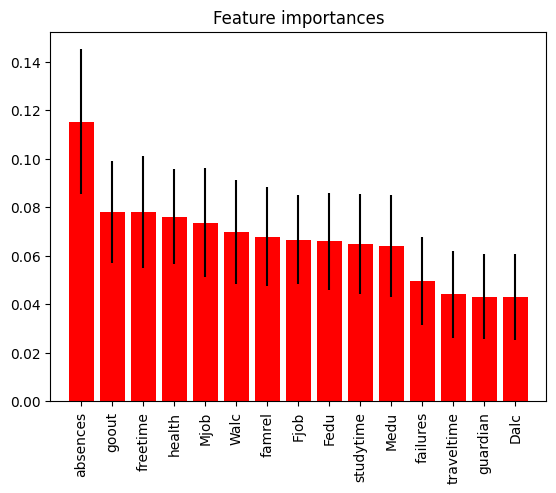

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_val contains your features and Y_val contains your target variable

# 1. Splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_val, Y_val, test_size=0.2, random_state=42)

# 2. Fitting the model (using RandomForestClassifier as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Plotting feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [53]:
# ... (previous code for feature selection) ...

# 6. Retrain the model with selected features
model_selected = RandomForestClassifier(random_state=42)  # Create a new model instance
model_selected.fit(X_train_selected, y_train)  # Train on selected features

# 7. Make predictions on the test set
y_pred_selected = model_selected.predict(X_test_selected)

# 8. Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_selected)
print("\nAccuracy with selected features:", accuracy)

report = classification_report(y_test, y_pred_selected)
print("\nClassification Report:\n", report)

# ... (further analysis or model refinement as needed) ...


Accuracy with selected features: 0.25333333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.38      0.36        16
           1       0.20      0.18      0.19        17
           2       0.11      0.17      0.13        12
           3       0.45      0.31      0.37        16
           4       0.23      0.21      0.22        14

    accuracy                           0.25        75
   macro avg       0.27      0.25      0.25        75
weighted avg       0.28      0.25      0.26        75



In [54]:
from sklearn import metrics

c_matrix = metrics.confusion_matrix(test_y,y_pred)
c_matrix

array([[1, 5, 4, 4, 0],
       [4, 1, 4, 2, 1],
       [6, 3, 2, 6, 1],
       [2, 0, 2, 4, 2],
       [4, 5, 2, 2, 8]])

Text(58.222222222222214, 0.5, 'Actual values')

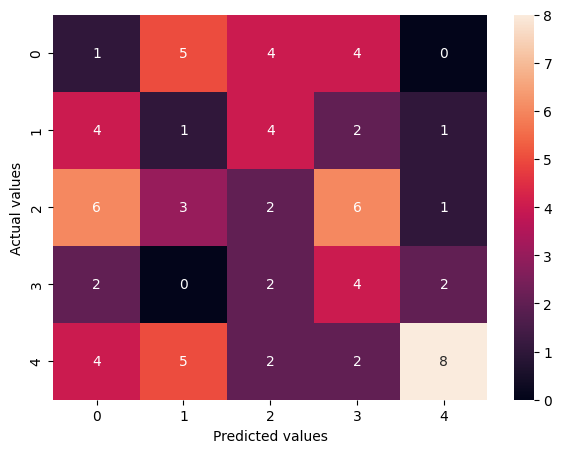

In [56]:
# Using seaborn and plt for better visualization
import seaborn as sn
plt.figure(figsize=(7,5))
# Replace confusion_matrix_v1 with c_matrix
sn.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')